# Preprocessing Airline Passenger Satisfaction<br/>

In [11]:
import numpy as np
import pandas as pd

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

In [13]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sns.set_style('whitegrid')

# Part 1 – Dataset Presentation  

- This dataset contains an airline passenger satisfaction survey, indicating the factors correlated to a satisfied (or dissatisfied) passenger. It could be used to predict passenger satisfaction based on a number of measures. The original dataset from Kaggle (https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?select=train.csv) contains two csv files for train and test data. So, it is necessary to combine them to form a single data set. The final dataset has 25 columns and 129880 rows. The columns ‘Unnamed: 0' and 'id’ represent the index and id of the respondents in the survey, so in the first step it would be better to drop them. The three first records of the dataset are shown below.  

In [14]:
original_train = pd.read_csv("train.csv")
original_test = pd.read_csv("test.csv")
passenger = pd.concat([original_train,original_test],axis=0)
passenger = passenger.drop(columns=['Unnamed: 0', 'id'])
passenger['satisfaction'] = passenger['satisfaction'].str.title()
passenger.head(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,Neutral Or Dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,Neutral Or Dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,Satisfied


- The target variable (dependent variable) is ‘**Satisfaction**’ (i.e., : satisfaction level of passengers) which is a binary feature with values of ‘**Satisfaction**’ and ‘**Neutral or Dissatisfaction**’.  
- The bar plot below shows that the number of dissatisfied or neutral passengers in this survey are greater than the satisfied passengers.

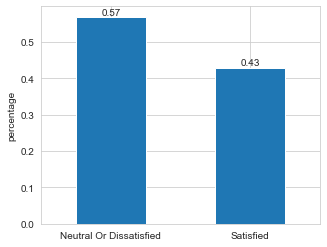

In [8]:
fig, axs = plt.subplots()
passenger['satisfaction'].value_counts(normalize=True).round(2).plot.bar(ylabel='percentage',rot=0)
axs.bar_label(axs.containers[0])
plt.show()

## 1.1. Attributes Description

### Gender: 
- This feature shows the gender of the passengers (Female, Male). 50.7% of passengers in the survey are Female and 49.3 % are Male. The results (the left plot) show that the number of female and male passengers in this survey are almost equal, with the number of females just a little greater than male. 
- The right hand side plot shows that in both male and female passengers the number of dissatisfied passengers is greater than the satisfied ones, which can be explained by the greater number of dissatisfied passengers overally. 

In [92]:
def feature_vs_target(feature: str, target: str='satisfaction') ->None:   
    fig, axs =plt.subplots(1,2,figsize=(9, 4))
    passenger[feature].value_counts(sort=False,normalize=True).round(2).sort_index().plot.bar(ylabel='frequency',rot=0,ax=axs[0])
    axs[0].bar_label(axs[0].containers[0])
    
    pd.crosstab(index=passenger[feature], columns=passenger[target],normalize='all').round(2).plot(kind='bar',ax=axs[1],rot=0)
    axs[1].bar_label(axs[1].containers[0])
    axs[1].bar_label(axs[1].containers[1])

    plt.show()

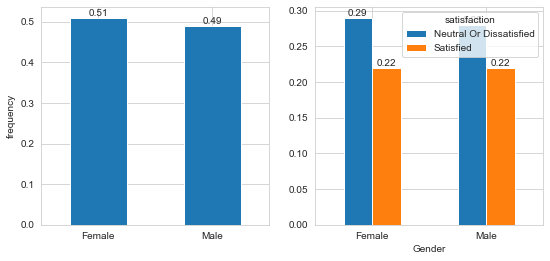

In [95]:
feature_vs_target('Gender')

### Customer Type:
- This attribute indicates the customer type (Loyal customer, disloyal customer). The figure below (the left) shows that the number of loyal customers is much higher than disloyal customers (81.7% are Loyal Customers and 18.3% are Disloyal Customers). Moreover, the number of  dissatisfied passengers is greater than the satisfied ones in both loyal and disloyal customers(the right side plot), which is a result of higher dissatisfied passengers in this survey.

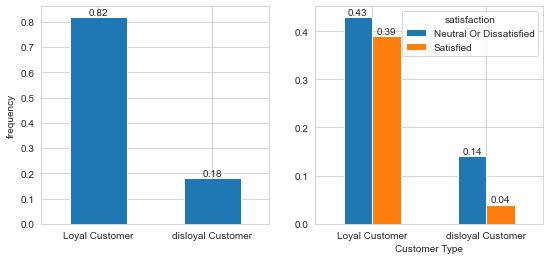

In [94]:
feature_vs_target('Customer Type', 'satisfaction')

### Age: 
- This variable shows the actual age of the passengers. The histogram below demonstrates that the age of passengers has a nearly normal distribution with mean of 39.4 and standard deviation of 15.1. Moreover, the maximum age is 85 and the minimum age is 7. The boxplot on the right side compares the age distribution for satisfied and dissatisfied passengers, which indicates that the mean age for satisfied passengers is slightly higher. 

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.4,15.1,7.0,27.0,40.0,51.0,85.0


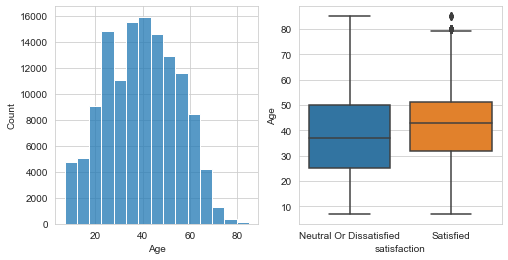

In [78]:
fig,axs = plt.subplots(1,2,figsize=(8, 4))
sns.histplot(data=passenger['Age'],bins=15, ax=axs[0])
sns.boxplot(x="satisfaction", y="Age", data=passenger, ax=axs[1])
passenger['Age'].describe().to_frame().transpose().round(1)

### Type of Travel: 
- This measure captures the purpose of the flight of the passengers (Personal Travel, Business Travel). The left plot shows that the number of business travelers is much higher than personal travelers (69.1 % of passengers are taking business travel, while 30.9 % of them are taking personal travel). The right side diagram illustrates that in personal travels the number of dissatisfied passengers are much higher than the satisfied ones, however for the business travels we see a different result as the number of satisfied passengers in the business travels is higher.

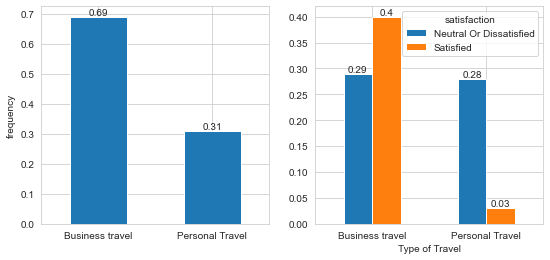

In [96]:
feature_vs_target('Type of Travel', 'satisfaction')

### Class: 
- This feature describes travel class in the plane of the passengers (Business, Eco, Eco Plus). The left picture shows that the number of Business class (47.9%) and Eco class (44.9 %) are almost equal, with only 7.2 % of passengers taking Eco Plus class . However, the right side plot indicates that when passengers travel in Business class the satisfaction rate is much higher. On the other hand, when they travel in Eco class the dissatisfaction rate goes much higher. This is justifiable by the better services that airlines offer in Business class. 
- Regarding the Eco Plus class we see somehow similar results to Eco class as in this class the dissatisfied passengers are much greater. 

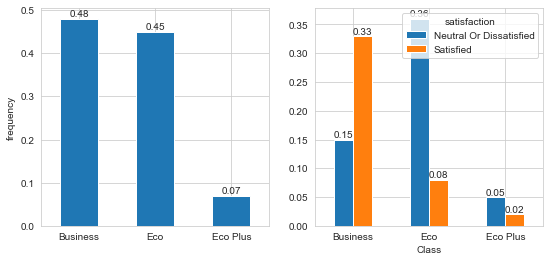

In [97]:
feature_vs_target('Class', 'satisfaction')

- In order to see the effects of Type of Travel on the Class, the two following plots are created. The first plot shows that when travel type is personal, passengers tend to choose Eco class. However, when it is a business trip, the passengers tend to select Business class. This is likely the reason behind the observation that in personal travels the dissatisfaction rate is much higher as they prefer to choose Eco class. 
- The second plot shows the same idea but for separated satisfied and dissatisfied passengers. The left side of the second plot demonstrates most of the dissatisfaction is when it is a personal trip with Eco class or when it is a business trip with Eco class. The right side of this graph shows, however, most of the satisfaction happens when it is a business trip with Business class. 

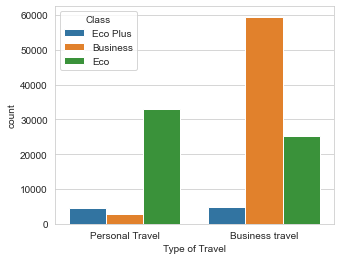

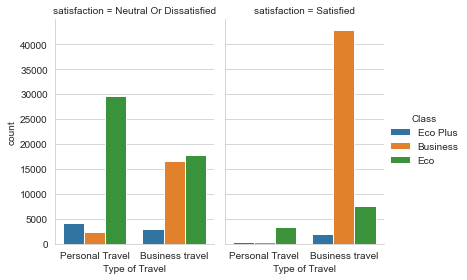

In [15]:
sns.countplot(hue="Class", x="Type of Travel", data=passenger)
sns.catplot(x="Type of Travel", hue="Class", col="satisfaction",
                data=passenger, kind="count",height=4, aspect=.7)

### Flight distance: 
- This variable shows the flight distance of this journey. The following pictures show the distribution of distance and its relationship with satisfaction. With the mean of 1190.3 and standard deviation 997.5, we can see that the distribution of this feature has skewness. The significant difference between maximum value and third quartile (quartile 0.75), indicates that there are some outliers in the data, as the boxplot shows. 
- The boxplot shows that when the mean flight distance is higher, the passengers are more satisfied.  However, the results might have been affected by the outliers in the dissatisfied group.

,count,mean,std,min,25%,50%,75%,max
Flight Distance,129880.0,1190.3,997.5,31.0,414.0,844.0,1744.0,4983.0


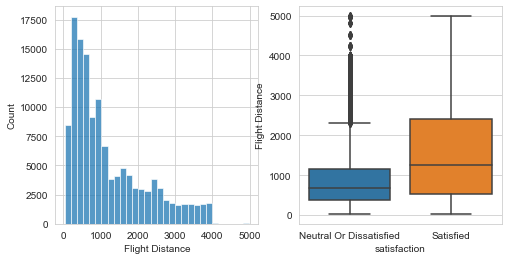

In [84]:
fig,axs = plt.subplots(1,2,figsize=(8, 4))
sb.histplot(data=passenger['Flight Distance'],bins=30, ax=axs[0])
sb.boxplot(x="satisfaction", y="Flight Distance", data=passenger, ax=axs[1])
passenger['Flight Distance'].describe().to_frame().transpose().round(1)

### Inflight wifi service: 
- The metric measures the satisfaction level of the inflight wifi service (0: Not Applicable; 1-5). The mean satisfaction is 2.73 (out of 5) with standard deviation 1.33 which means that the service level is ordinary, not very good. The right side plot illustrates that when the service level is middle (2 or 3) the dissatisfaction rate is much higher. It also reveals that as the service level gets better, the satisfaction rate (target variable) would increase. 

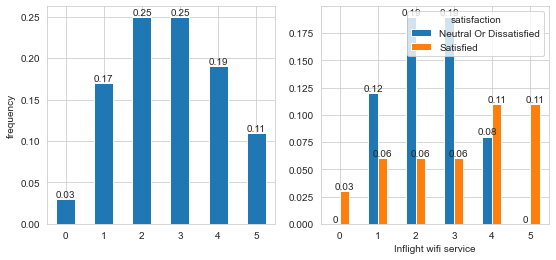

,count,mean,std,min,25%,50%,75%,max
Inflight wifi service,129880.0,2.73,1.33,0.0,2.0,3.0,4.0,5.0


In [101]:
feature_vs_target('Inflight wifi service', 'satisfaction')
passenger['Inflight wifi service'].describe().to_frame().transpose().round(2)

### Departure/Arrival time convenient: 
- This feature tells how satisfied passengers are with Departure/Arrival time convenient. For this feature, the mean satisfaction is 3.06 (out of 5) which is an average satisfaction and the standard deviation is 1.53. The right side diagram shows that even when the satisfaction with service is high (4,5) the number of dissatisfied passengers is greater. We can also see the trend that as satisfaction level increases the satisfaction rate would increase. 

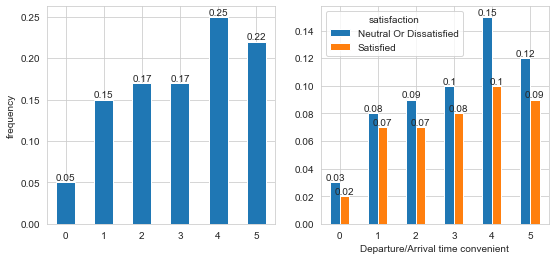

,count,mean,std,min,25%,50%,75%,max
Departure/Arrival time convenient,129880.0,3.06,1.53,0.0,2.0,3.0,4.0,5.0


In [100]:
feature_vs_target('Departure/Arrival time convenient', 'satisfaction')
passenger['Departure/Arrival time convenient'].describe().to_frame().transpose().round(2)

### Ease of Online booking: 
- The attribute captures the satisfaction level of online booking. For this service the mean satisfaction is 2.76 (out of 5) with the standard deviation of 1.4,  which means that the service level is mediocre, not very good. The right side plot shows that when the service level is middle (2 or 3) the dissatisfaction rate is greater. It also shows that as the service level gets better, the satisfaction rate (target variable) would get better. 

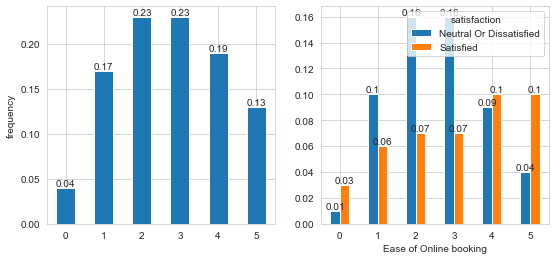

,count,mean,std,min,25%,50%,75%,max
Ease of Online booking,129880.0,2.76,1.4,0.0,2.0,3.0,4.0,5.0


In [102]:
feature_vs_target('Ease of Online booking', 'satisfaction')
passenger['Ease of Online booking'].describe().to_frame().transpose().round(2)

### Gate location: 
- This attribute indicates to what extent the passengers are happy with the gate location. The mean satisfaction level here is 2.98 (out of 5) with the standard deviation 1.28, which is an average level. When the service level is average (3,4) the dissatisfaction rate is higher. 

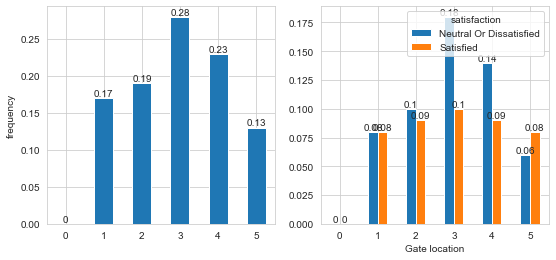

,count,mean,std,min,25%,50%,75%,max
Gate location,129880.0,2.98,1.28,0.0,2.0,3.0,4.0,5.0


In [103]:
feature_vs_target('Gate location', 'satisfaction')
passenger['Gate location'].describe().to_frame().transpose().round(2)

### Food and drink: 
- This feature measures the satisfaction level of Food and Drink. The mean satisfaction is 3.20 (out of 5) and the standard deviation is 1.33, which seems the service level is above the average. And we can see in the diagram that as the satisfaction level gets higher, more passengers would be satisfied with the flight. 

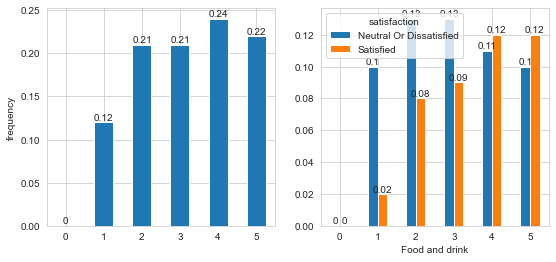

,count,mean,std,min,25%,50%,75%,max
Food and drink,129880.0,3.2,1.33,0.0,2.0,3.0,4.0,5.0


In [104]:
feature_vs_target('Food and drink', 'satisfaction')
passenger['Food and drink'].describe().to_frame().transpose().round(2)

### Online boarding: 
- This variable shows the satisfaction level of online boarding. Here, the mean satisfaction is 3.25 (out of 5) with the standard deviation 1.35, which seems reasonable. The plot illustrates that when the service level is average (2,3) the dissatisfied passengers are much greater, but when the service level is high (4,5) an increase in the satisfied passengers could be seen. 

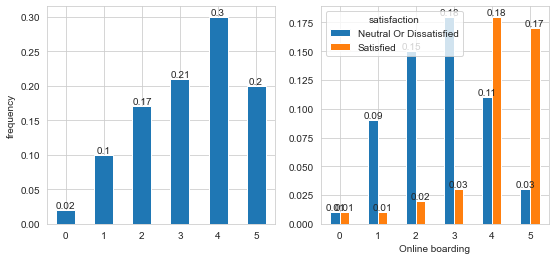

,count,mean,std,min,25%,50%,75%,max
Online boarding,129880.0,3.25,1.35,0.0,2.0,3.0,4.0,5.0


In [105]:
feature_vs_target('Online boarding', 'satisfaction')
passenger['Online boarding'].describe().to_frame().transpose().round(2)

### Seat comfort: 
- This measure shows the passengers’ satisfaction level with seat comfort. The mean satisfaction is 3.44 (out of 5) with the standard deviation 1.32, which is a good service level. The below figure shows for the high satisfaction level of this service (4,5) the number of satisfied passengers are much higher, but for averable of low service level (1,2,3) the dissatisfied passengers are greater. 

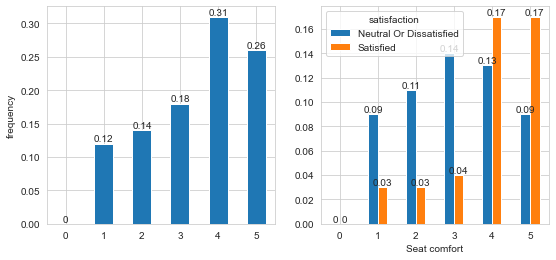

,count,mean,std,min,25%,50%,75%,max
Seat comfort,129880.0,3.44,1.32,0.0,2.0,4.0,5.0,5.0


In [106]:
feature_vs_target('Seat comfort', 'satisfaction')
passenger['Seat comfort'].describe().to_frame().transpose().round(2)

### Inflight entertainment: 
- This feature describes the satisfaction level of inflight entertainment. The mean satisfaction with this service is 3.36 (out of 5) with the standard deviation 1.33, which seems appropriate. We can see again that when the service level is low (1,2,3) most of the passengers are dissatisfied, but when the service level is high most of them seem satisfied. 

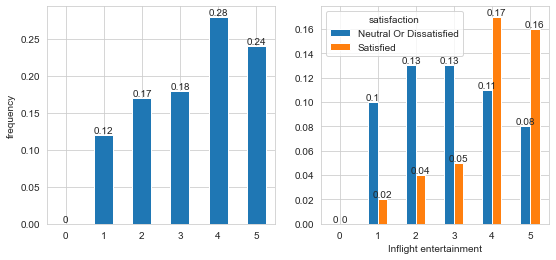

,count,mean,std,min,25%,50%,75%,max
Inflight entertainment,129880.0,3.36,1.33,0.0,2.0,4.0,4.0,5.0


In [107]:
feature_vs_target('Inflight entertainment', 'satisfaction')
passenger['Inflight entertainment'].describe().to_frame().transpose().round(2)

### On-board service: 
- This attribute measures the satisfaction level of on-board service. The mean satisfaction level is 3.38 (out of 5) with the standard deviation 1.29, which indicates that the service level is above average. The same pattern is seen here again, which indicates that for low service level (1,2,3) the passengers would be dissatisfied, but for high service level (4,5) most of them would be satisfied. 

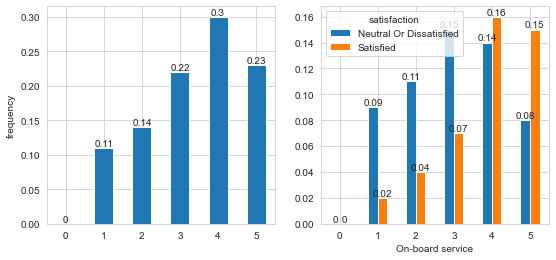

,count,mean,std,min,25%,50%,75%,max
On-board service,129880.0,3.38,1.29,0.0,2.0,4.0,4.0,5.0


In [108]:
feature_vs_target('On-board service', 'satisfaction')
passenger['On-board service'].describe().to_frame().transpose().round(2)

### Leg room service: 
- This variable shows the satisfaction level of Leg room service. The mean satisfaction level is 3.35 (out of 5) with the standard deviation 1.32, which is above the average service level. We can see that as the service level gets higher, more passengers become satisfied. 

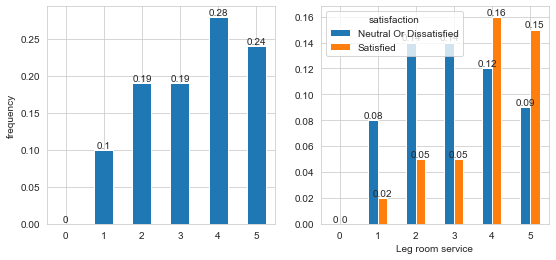

,count,mean,std,min,25%,50%,75%,max
Leg room service,129880.0,3.35,1.32,0.0,2.0,4.0,4.0,5.0


In [109]:
feature_vs_target('Leg room service', 'satisfaction')
passenger['Leg room service'].describe().to_frame().transpose().round(2)

### Baggage handling: 
- This variable measures the passengers satisfaction with baggage handling. The mean satisfaction level is 3.63 (out of 5) with the standard deviation 1.18, which is above the average level of service. The plot shows that as the service level increases, more passengers would be satisfied with the flight.

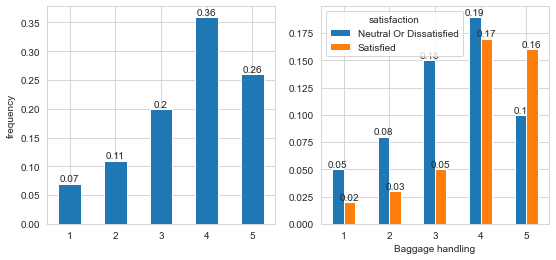

,count,mean,std,min,25%,50%,75%,max
Baggage handling,129880.0,3.63,1.18,1.0,3.0,4.0,5.0,5.0


In [110]:
feature_vs_target('Baggage handling', 'satisfaction')
passenger['Baggage handling'].describe().to_frame().transpose().round(2)

### Check-in service: 
- This variable shows the satisfaction level of Check-in service. Out of 5, the mean service level is 3.31 with 1.27 standard deviation, which is above the average service quality. We can again see that when the service level gets better, a greater number of passengers become satisfied with the flight. We can also see that for low service levels (1,2,3) the dissatisfied passengers are much greater. 

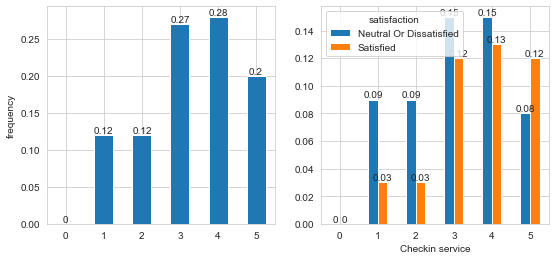

,count,mean,std,min,25%,50%,75%,max
Checkin service,129880.0,3.31,1.27,0.0,3.0,3.0,4.0,5.0


In [111]:
feature_vs_target('Checkin service', 'satisfaction')
passenger['Checkin service'].describe().to_frame().transpose().round(2)

### Inflight service: 
- This attribute is about the satisfaction level of inflight service. Out of 5, the mean satisfaction is 3.64 with the standard deviation 1.18,  which is a good service quality. Here we can see that even for service level 4 the number of dissatisfied passengers is higher. But for service level 5 the satisfied passengers become greater. 

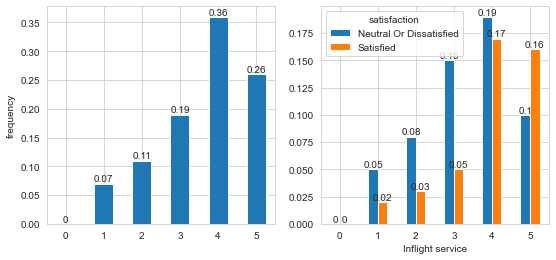

,count,mean,std,min,25%,50%,75%,max
Inflight service,129880.0,3.64,1.18,0.0,3.0,4.0,5.0,5.0


In [112]:
feature_vs_target('Inflight service', 'satisfaction')
passenger['Inflight service'].describe().to_frame().transpose().round(2)

### Cleanliness: 
- This feature tells what is the satisfaction level of Cleanliness. Out of 5, the mean satisfaction is 3.29 with the standard deviation 1.31, indicating a good service level. The plot shows that for high service levels (4,5) more passengers would be satisfied, but for low service level (1,2,3) the dissatisfied passengers are greater. 

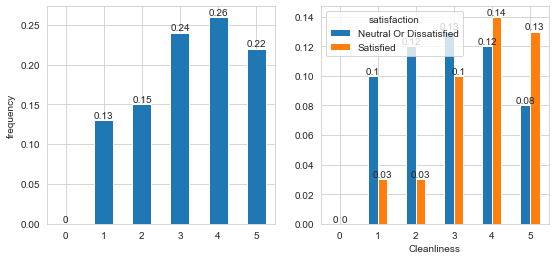

,count,mean,std,min,25%,50%,75%,max
Cleanliness,129880.0,3.29,1.31,0.0,2.0,3.0,4.0,5.0


In [113]:
feature_vs_target('Cleanliness', 'satisfaction')
passenger['Cleanliness'].describe().to_frame().transpose().round(2)

### Departure Delay in Minutes: 
- This variable measures the delay in departure (by minutes). The mean of departure delay is 14.7 with a high standard deviation of 38.1. The maximum value is very much greater than the third quartile, which is a sign of a large number of outliers, as the boxplot on the right side shows. The min, Q1, Q2 (median) are all 0, which means that many of the values here are 0 indicating no delay in the flight. 

,count,mean,std,min,25%,50%,75%,max
Departure Delay in Minutes,129880.0,14.7,38.1,0.0,0.0,0.0,12.0,1592.0


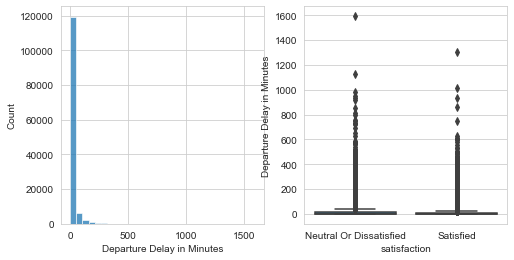

In [114]:
fig,axs = plt.subplots(1,2,figsize=(8, 4))
sns.histplot(data=passenger['Departure Delay in Minutes'],bins=30, ax=axs[0])
sns.boxplot(x="satisfaction", y="Departure Delay in Minutes", data=passenger, ax=axs[1])
passenger['Departure Delay in Minutes'].describe().to_frame().transpose().round(1)

### Arrival Delay in Minutes: 
- This feature captures the delay in arrival (by minutes). The mean arrival delay is 15.1 with a high standard deviation of 38.5. This significant difference between the maximum value and the third quartile, shows that there are many outliers in the data, as the boxplot illustrates. The min, Q1, Q2 (median) are all 9, which means that there are no delays in the arrival of most of the flights. 

,count,mean,std,min,25%,50%,75%,max
Arrival Delay in Minutes,129487.0,15.1,38.5,0.0,0.0,0.0,13.0,1584.0


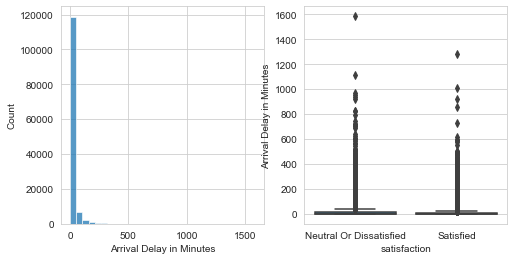

In [116]:
fig,axs = plt.subplots(1,2,figsize=(8, 4))
sns.histplot(data=passenger['Arrival Delay in Minutes'],bins=30, ax=axs[0])
sns.boxplot(x="satisfaction", y="Arrival Delay in Minutes", data=passenger, ax=axs[1])
passenger['Arrival Delay in Minutes'].describe().to_frame().transpose().round(1)

# Part 2: Exploring Outliers and Missing Data

## 2.1. Encoding Categorical Variables

In [16]:
passenger['Gender'].replace(to_replace=['Male', 'Female'], value=[0, 1], inplace=True)
passenger['Customer Type'].replace(to_replace=['disloyal Customer', 'Loyal Customer'], value=[0, 1], inplace=True)
passenger['Type of Travel'].replace(to_replace=['Personal Travel', 'Business travel'], value=[0, 1], inplace=True)
passenger['Class'].replace(to_replace=['Business', 'Eco', 'Eco Plus'], value=[1, 2, 3], inplace=True)
passenger['satisfaction'].replace(to_replace=['Neutral Or Dissatisfied', 'Satisfied'], value=[0, 1], inplace=True)
passenger.head(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,13,0,3,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,0,25,1,1,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,1,26,1,1,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1


## 2.2. Exploring Outliers

Four features in the dataset are continuous variables including: 'Age', 'Flight Distance', 'Departure Delay in Minutes', and 'Arrival Delay in Minutes'. Using 1.5 x IQR (InterQuartile Range) above from the third quartile (Q3) as upper limit and 1.5 x IQR blew from first quartile (Q1) as lower limit, the number of outliers data in each of these features is as follows.

In [17]:
def count_outliers(df: pd.DataFrame, columns:list[str]):
    '''This function counts the number of outiers in each input column'''
    for col in columns:
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3-Q1
        high_lim = Q3 + 1.5 * IQR
        low_lim = Q1 - 1.5 * IQR
        
        n = ((df[col] >= high_lim).sum()) + ((df[col] <= low_lim).sum())
        print(f'Number of Outliers in {col}: {n}')

In [18]:
cont_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
count_outliers(passenger, cont_columns)

Number of Outliers in Age: 0
Number of Outliers in Flight Distance: 2864
Number of Outliers in Departure Delay in Minutes: 18643
Number of Outliers in Arrival Delay in Minutes: 17492


**Removing Outliers:**¶<br>
The following function removes outliers from the dataset. The outliers_df represents all the rows in the data that contain outliers. The filtered_df represents the final cleaned data that does not contain any outliers or missing values.

In [19]:
def drop_outliers(data: pd.DataFrame, columns: list[str])->pd.DataFrame:
    indexes = np.array([])
    for column in columns:
        Q1, Q3 = data[column].quantile([0.25, 0.75])
        IQR = Q3-Q1
        outliers_indexes = data[(data[column] >= (Q3 + 1.5 * IQR)) | (data[column] <= (Q1 - 1.5 * IQR))].index.to_numpy()
        indexes = np.append(indexes, outliers_indexes)
    indexes = np.unique(indexes)
    outliers = data.iloc[indexes].reset_index(drop=True)
    filtered = data.drop(indexes).reset_index(drop=True)
    return outliers, filtered

In [20]:
outliers_df, filtered_df = drop_outliers(passenger, cont_columns)
filtered_df.shape

(98632, 23)

## 2.3. Handling Missing Data

The number of missing data in each feature is as follows. In the original dataset, only the ‘Arrival Delay in Minutes’ has some missing data.

In [21]:
print(f"The Number of Missing Values in Each Column:\n{filtered_df.isnull().sum()}")

The Number of Missing Values in Each Column:
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             243
satisfaction                           0
dtype: int64

In [13]:
def plot_boostrap(df, col="Arrival Delay in Minutes"):
    fig,axs = plt.subplots(1,2,figsize=(9, 4))
    df[col].plot.hist(ax=axs[0])
    pd.DataFrame({'Mean Delay':[df.sample(20,replace=True)[col].mean() for i in range(0,100)]}).plot.hist(ax=axs[1])

In [14]:
#sm.qqplot(bs['mean_rating'], line='45')
#pylab.show()

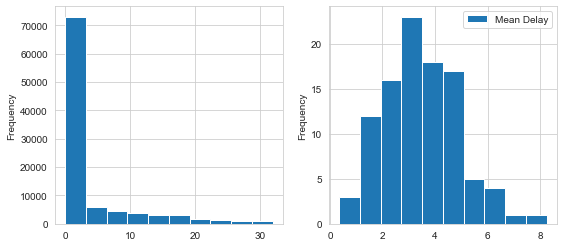

In [15]:
plot_boostrap(filtered_df)

### Strategy 1: Pairwise Deletion

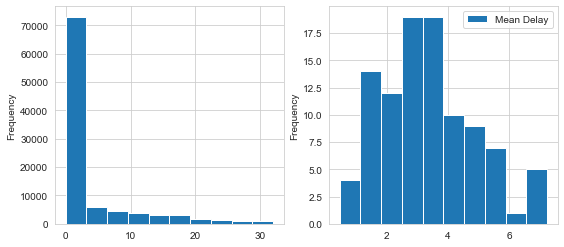

In [346]:
df_dlt = filtered_df.dropna()
plot_boostrap(df_dlt)

### Strategy 2: Fill Missing Data with Mean

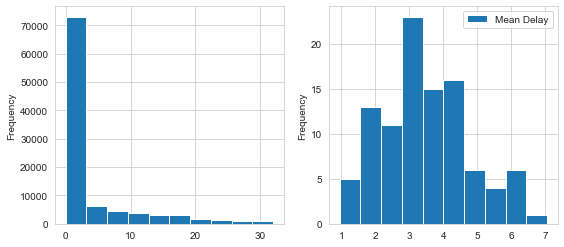

In [347]:
df = filtered_df
df_mean = df.fillna(df.mean())
plot_boostrap(df_mean)

### Strategy 3:Iterative Impute of Missing Data with Linear Regression

In [348]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [373]:
lr = LinearRegression()
df = filtered_df
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=5, verbose=2, imputation_order='roman',random_state=0)
ImputedData = imp.fit_transform(df)
df_lr = pd.DataFrame(ImputedData.round(2), columns=df.columns, index=list(df.index))

[IterativeImputer] Completing matrix with shape (98632, 23)
[IterativeImputer] Ending imputation round 1/5, elapsed time 2.13
[IterativeImputer] Change: 15.452396389214728, scaled tolerance: 3.738 
[IterativeImputer] Ending imputation round 2/5, elapsed time 3.71
[IterativeImputer] Change: 0.0, scaled tolerance: 3.738 
[IterativeImputer] Early stopping criterion reached.


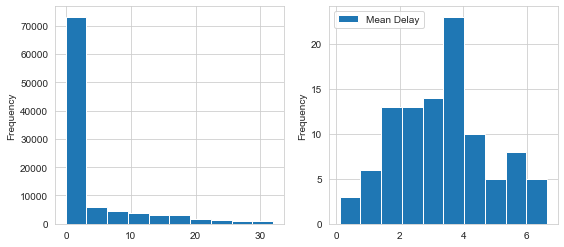

In [374]:
plot_boostrap(df_lr)

### Strategy 4: Impute Missing Data with KNN

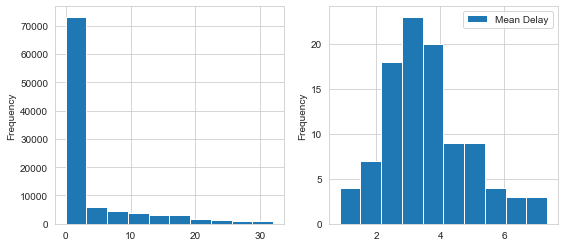

In [375]:
from sklearn.impute import KNNImputer
df = filtered_df
knn = KNNImputer(n_neighbors=3)
knn.fit(df)
df_knn = pd.DataFrame(knn.transform(df).round(2), columns=df.columns, index=list(df.index))
plot_boostrap(df_knn)

### Strategy 5: Multiple Imputation by Chained Equations

In [26]:
#!pip install miceforest

In [22]:
import miceforest as mf

In [23]:
df = filtered_df
kds = mf.ImputationKernel(df, datasets=5, save_all_iterations=True, random_state=11)
# Run the MICE algorithm for 6 iterations
kds.mice(6)
kds.complete_data(0)
df_mice = pd.concat([kds.complete_data(i) for i in range(5)]).groupby(level=0).mean()

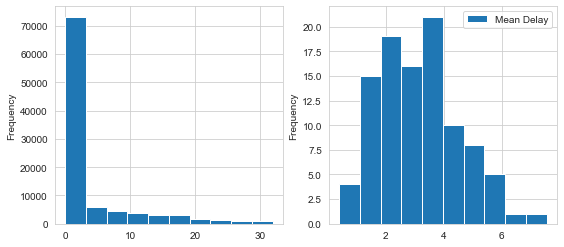

In [22]:
plot_boostrap(df_mice)

### Strategy 6: Impute Missing Data with Maximun Likelihood (Expectation Maiximiazaion)

In [ ]:
#!pip install impyute

In [17]:
import impyute

In [18]:
df = filtered_df
df_em = pd.DataFrame(impyute.imputation.cs.em(df.to_numpy(), loops=50).round(2), columns=df.columns, index=list(df.index))

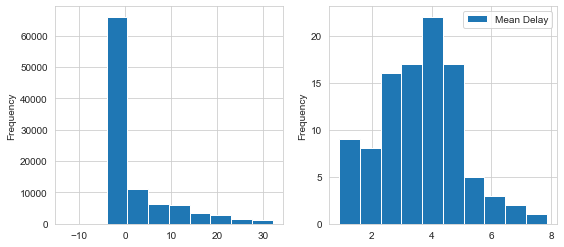

In [19]:
plot_boostrap(df_em)

### Handling Missing Data: Discussion
The results show that using Expectation Maximization, the bootstrap sampling of data is more like the normal distribution. So, the strategy is more promising in imputing missing data.

In [24]:
#passenger_df = df_em
passenger_df = df_mice
print(passenger_df.shape)
passenger_df.head(3)

(98632, 23)


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0.0,0.0,25.0,1.0,1.0,235.0,3.0,2.0,3.0,3.0,...,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0,0.0
1,1.0,1.0,26.0,1.0,1.0,1142.0,2.0,2.0,2.0,2.0,...,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0,1.0
2,1.0,1.0,25.0,1.0,1.0,562.0,2.0,5.0,5.0,5.0,...,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0,0.0


# Part 3 – Data Scaling
- To investigate the effects of scaling techniques on this dataset, it is necessary to consider that the attributes of this dataset could be divided into three groups:
    - Continuous Variables including: 'Age', 'Flight Distance', 'Departure Delay in Minutes', and 'Arrival Delay in Minutes'.
    - Categorical Ordinal Variables including: 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding',  'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness',. These features range from 0 to 5. 
    - Categorical Nominal or Binary Variables including: 'Gender', 'Customer Type', 'Type of Travel', 'Class'. Here we only have two or three nominal categories. So, data scaling does not have any effects here. 
- In the following the effects of scaling techniques on each of the groups are discussed separately. 



In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

In [30]:
scalers_names = ['MinMax', 'MaxAbs', 'Robust', 'Quantile']
scalers = [MinMaxScaler(), MaxAbsScaler(), RobustScaler(), QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')]

In [31]:
def plot_scalers_effects(df, columns, scalers, scaler_names,figsize=(16,18)):
    fig, axs = plt.subplots(len(columns),len(scalers)+1,figsize=figsize)
    axs = axs.flatten()
    i = 0 
    for c in columns:
        df[c].hist(ax=axs[i])
        #df[c].plot.density(ax=axs[i])
        axs[i].set(title=f'{c}: Raw Data')
        i+=1
        for j in range(len(scalers)):
            df_transformed = scalers[j].fit_transform(df)
            df_transformed = pd.DataFrame(df_transformed, index=df.index, columns=df.columns)
            df_transformed[c].hist(ax=axs[i])
            #df_transformed[c].plotdensity(ax=axs[i])
            axs[i].set(title=scalers_names[j])
            i+=1
    plt.show()

## 3.1. Data Scaling of Continuous Variables:
- The figure below shows the effects of different scalers on the continuous features. We can see that by using MinMaxScaler the data shifts to values between 0 and 1. MaxAbsScaler would have the same results as MinMaxScaler (since there are no negative values in the data). It is also clear that the QuantileTransformer scaler changes the distribution of the data for some of the features. 

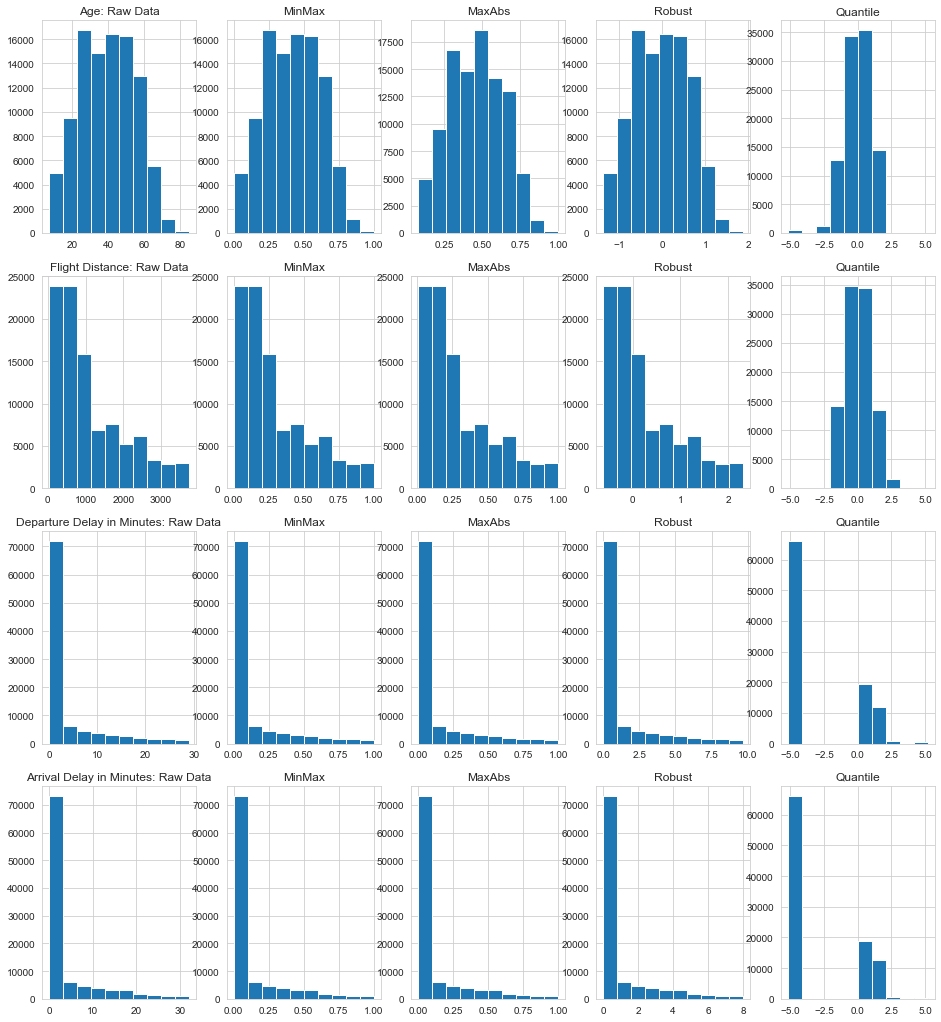

In [32]:
col_names = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
cont_df = passenger_df[col_names]
plot_scalers_effects(cont_df, col_names, scalers, scalers_names)

## 3.2. Data Scaling of Categorical Ordinal Variables:

- The following figures show the effects of the six scalers on the categorical ordinal attributes. Since here the features are categorical ordinal variables, the scalers do not change the distribution of the variables. They just change their values. 

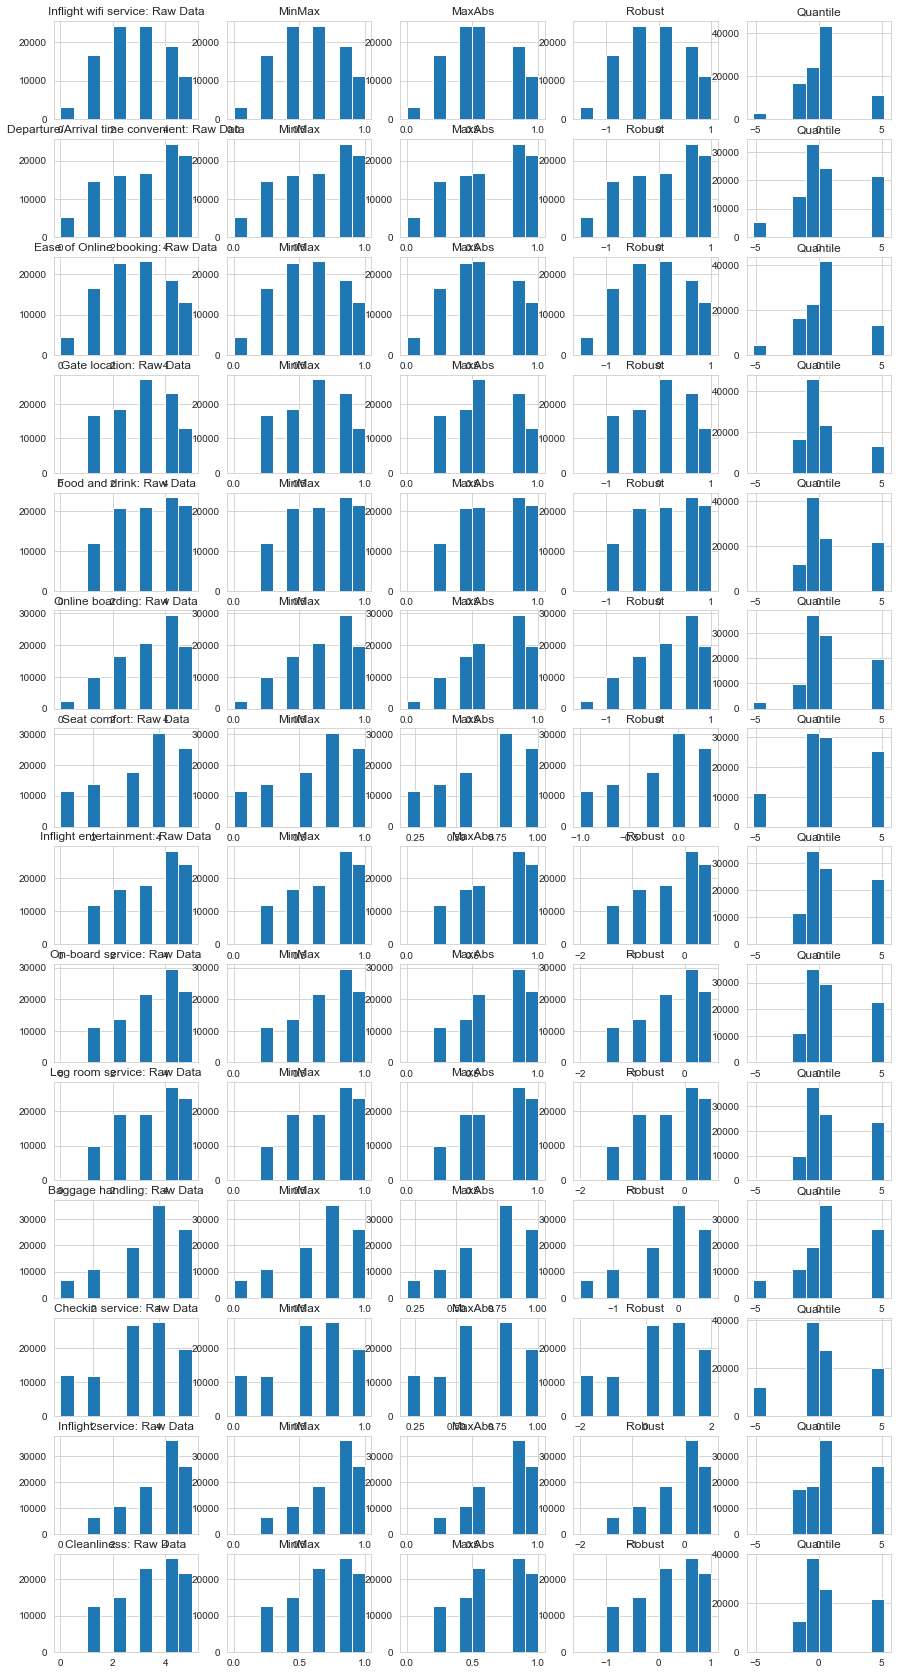

In [482]:
col_names = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding',  'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
cat_df = passenger_df[col_names]
plot_scalers_effects(cat_df, col_names, scalers, scalers_names,figsize=(15,30))

## 3.3. Data Scaling: Discussion
- The above results show that some scaling techniques have more effects on the data distribution and values than others. Since most of the features in this dataset are categorical ordinal variables, the scaling techniques that shift all features into the same data range would be better choices for this data set. So MinMaxScaler and MaxAbsScaler seem to work well with this data. On the other hand, since it is needed that at least one of the techniques changes the attribute’s distribution, QuantileTransformer  could meet this requirement. Thus, based on the characteristics of this dataset, the scaling techniques of MinMaxScaler, MaxAbsScaler, and QuantileTransformer are good choices for scaling this dataset. 


# Part 4 - Feature Selection:
- This part evaluates the effects of two feature selection techniques on a classification model and compares the results with a baseline model without feature selection. The target attribute (‘satisfaction’) is a categorical variable (i.e., it is a classification problem) and the features are a combination of continuous and categorical variables. So the features selection techniques should be aligned with this.

## 4.1. The Baseline Model:
- The following results show the performance of the baseline model (with feature selection) using *KNN* as the classifier with cross validation. 


In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

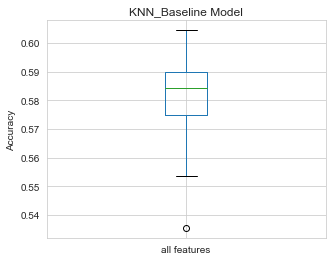

In [45]:
model = KNeighborsClassifier(n_neighbors=3)
model_name = 'KNN'
cv = RepeatedKFold(n_splits=3, n_repeats=4, random_state=100)
re_baseline = {}

scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
re_baseline['all features'] = scores

fig, axs = plt.subplots()
re_baseline_df = pd.DataFrame(re_baseline)
boxplot = re_baseline_df.boxplot()
axs.set_title('KNN_Baseline Model')
axs.set_ylabel('Accuracy')
plt.show()

## 4.2. Univariate Feature Selection :
- The first technique is Univariate feature selection with *chi2* as the scoring function (it is a classification model). Since this technique chooses the most ”relevant” subset of features and it is relatively fast and less expensive, it would be a good strategy for evaluating the effects of features selection of model performance. 
- The following results show that by using this method, 13 features would be selected as the optimal number of features. 

In [46]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

X = passenger_df.iloc[:, :-1]
y = passenger_df.iloc[:, -1]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

Text(0.5, 0, 'K-best feature')

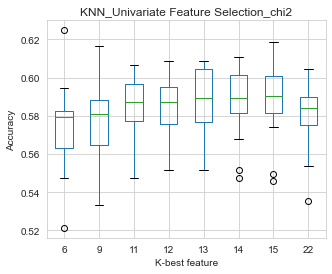

In [47]:
k_best = [6, 9, 11, 12, 13, 14, 15, 22]
score_function = chi2
score_function_names = 'chi2'
re_univariate = {}

for k in k_best:
    sel = SelectKBest(score_func=score_function, k=k)           
    X_sel = sel.fit_transform(X, y)
    scores = cross_val_score(model, X_sel, y, scoring='accuracy', cv=cv, n_jobs=-1)        
    re_univariate[k] = scores
re_univariate_df = pd.DataFrame(re_univariate)

fig, axs = plt.subplots()
re_univariate_df.boxplot()
axs.set_title(f'KNN_Univariate Feature Selection_{score_function_names}')
axs.set_ylabel("Accuracy")
axs.set_xlabel("K-best feature")

## 4.3. Wrapper Feature Selection:
- The second technique is a Wrapper feature selection approach with *forward* direction. Since the first technique is a Filter feature selection approach, it would be a good idea to compare its results with the Wrapper approach that is used in this technique. 

In [66]:
from sklearn.feature_selection import SequentialFeatureSelector

In [71]:
cv = RepeatedKFold(n_splits=3, n_repeats=4, random_state=100)

direction = 'forward'
total_num_features = len(passenger_r_df.drop(['satisfaction'], axis=1).columns)

re_wrapper = {}

for i in range(total_num_features-1):
    sfs = SequentialFeatureSelector(model, n_features_to_select=i+1, direction=direction)
    X_sel = sfs.fit_transform(X, y)    
    scores = cross_val_score(model, X_sel, y, scoring='accuracy', cv=cv, n_jobs=-1)
    re_wrapper[i+1] = scores
re_wrapper_df_ = pd.DataFrame(re_wrapper).copy()

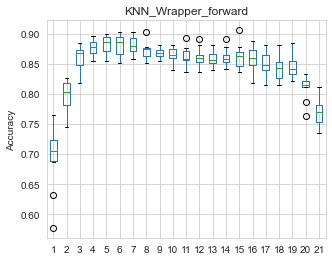

In [72]:
fig, axs = plt.subplots()
re_wrapper_df_.boxplot()
axs.set_title(f'KNN_Wrapper_{direction}');
axs.set_ylabel("Accuracy")
plt.show()

## 4.4. Comparing the Feature Selection Techniques
- The following boxplots show the results of both feature selection techniques along with the baseline performance. 

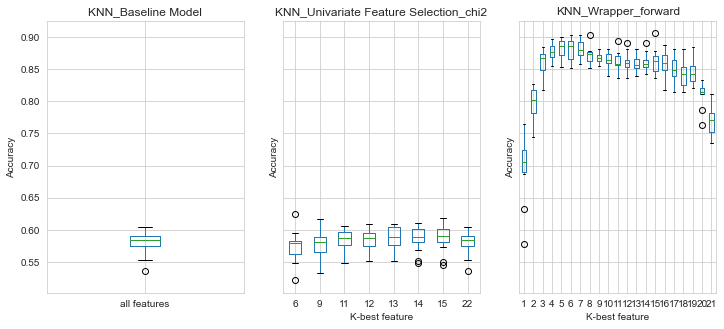

In [77]:
results = [re_baseline_df, re_univariate_df, re_wrapper_df_]
results_names = ['KNN_Baseline Model', 'KNN_Univariate Feature Selection_chi2',  'KNN_Wrapper_forward']

fig, axs = plt.subplots(1,3, figsize=(12,5),sharey=True)
for i in range(len(results)):
    results[i].boxplot(ax=axs[i])
    axs[i].set_title(results_names[i])
    axs[i].set_ylabel("Accuracy")
    if i != 0:
        axs[i].set_xlabel("K-best feature")

plt.show()

The results show that Wrapper Feature Selection with ‘forward’ direction create better **accuracy** for KNN model compared to other techniques. 



# Part 5: Data Classification

## 5.1. Decision Tree Classification

In [66]:
from sklearn import tree
from sklearn import tree, metrics, model_selection, preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, model_selection
from sklearn.metrics import classification_report, confusion_matrix

In [189]:
X = passenger_df.iloc[:, :-1]
y = passenger_df.iloc[:, -1]

In [190]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

In [61]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt_model = dt.fit(X, y)

In [62]:
feature_names = list(X.columns)
class_names = ['Neutral Or Dissatisfied', 'Satisfied']
text_representation = tree.export_text(dt_model, feature_names=feature_names)
#print(text_representation)

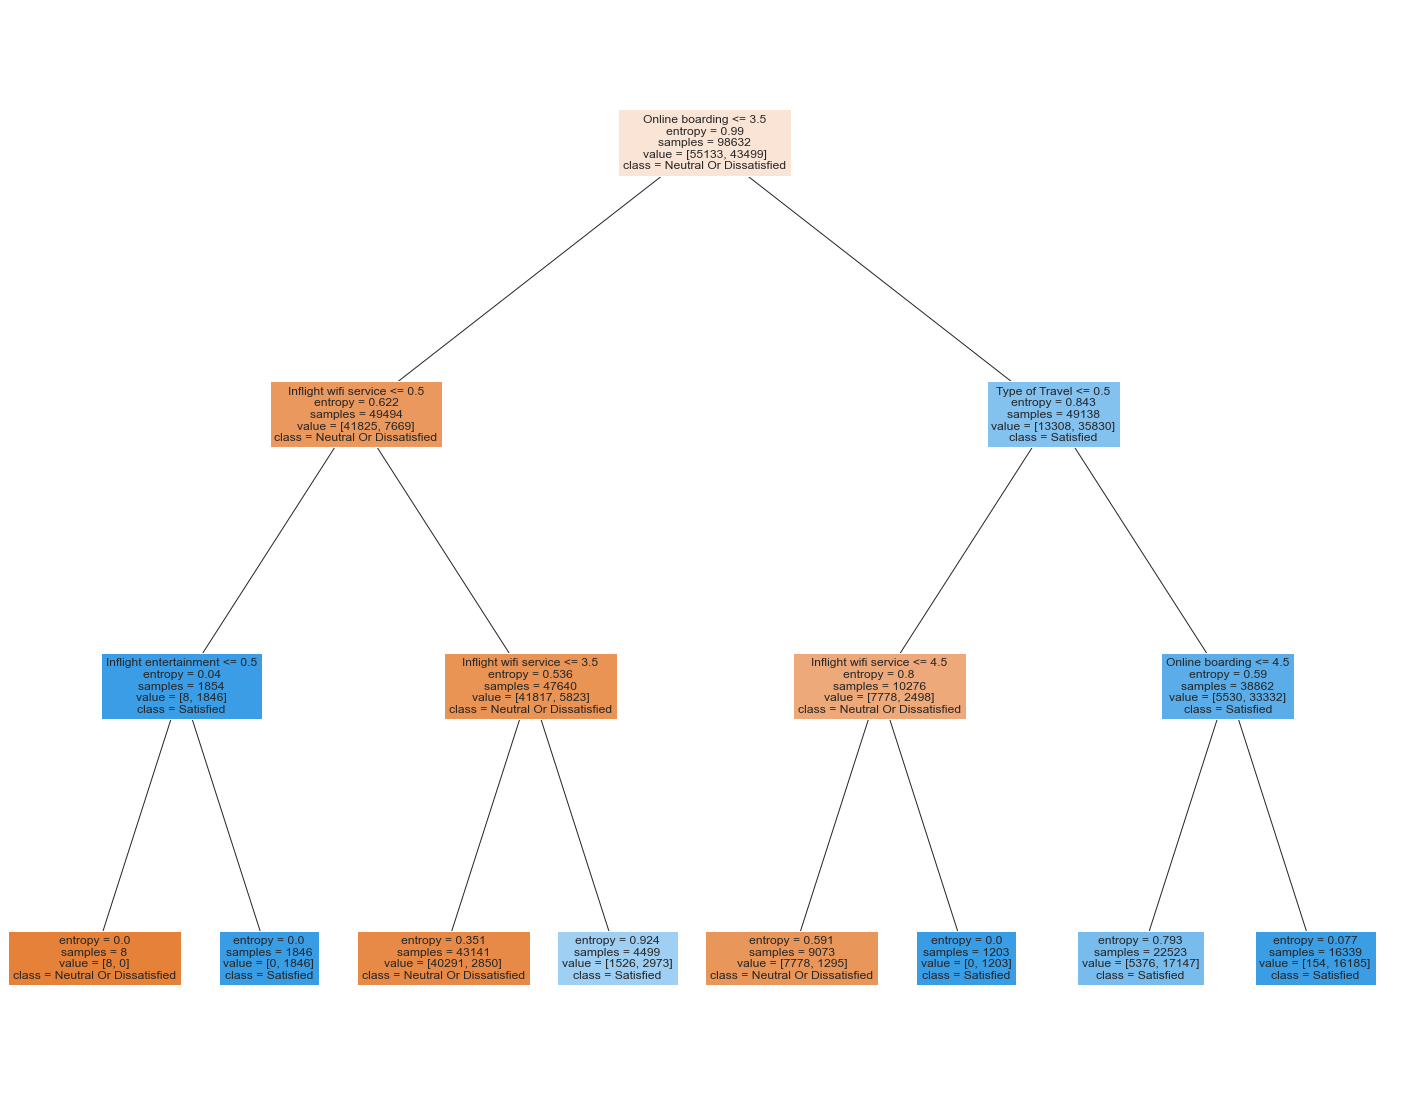

In [63]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_model, 
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [64]:
y_pred = dt_model.predict(X_test)

In [67]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.89


In [68]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14377  2135]
 [ 1251 11827]]
              precision    recall  f1-score   support

         0.0       0.92      0.87      0.89     16512
         1.0       0.85      0.90      0.87     13078

    accuracy                           0.89     29590
   macro avg       0.88      0.89      0.88     29590
weighted avg       0.89      0.89      0.89     29590



In [199]:
feature_importances = pd.DataFrame(list(zip(feature_names, dt_model.feature_importances_.round(3))),
               columns =['Feature', 'Importance']).sort_values(by='Importance', ascending=False)
feature_importances.head(5)

,Feature,Importance
11,Online boarding,0.543
6,Inflight wifi service,0.265
3,Type of Travel,0.190
13,Inflight entertainment,0.001
12,Seat comfort,0.000


The decision tree analysis shows that the most important features in determining the passenger satisfaction are: **Online boarding**, **Inflight wi-fi service**, **Type of Travel**, and **Inflight entertainment**.

## 5.2. Random Forest Classification

In [191]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5)
rf_model = rf.fit(X, y)

In [193]:
feature_names = list(X.columns)
class_names = ['Neutral Or Dissatisfied', 'Satisfied']

In [194]:
y_pred = rf_model.predict(X_test)

In [195]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.92


In [196]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15510  1002]
 [ 1396 11682]]
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93     16512
         1.0       0.92      0.89      0.91     13078

    accuracy                           0.92     29590
   macro avg       0.92      0.92      0.92     29590
weighted avg       0.92      0.92      0.92     29590



In [200]:
feature_importances = pd.DataFrame(list(zip(feature_names, rf_model.feature_importances_.round(3))),
               columns =['Feature', 'Importance']).sort_values(by='Importance', ascending=False)
feature_importances.head(10)

,Feature,Importance
11,Online boarding,0.206
4,Class,0.150
6,Inflight wifi service,0.145
3,Type of Travel,0.135
13,Inflight entertainment,0.083
12,Seat comfort,0.056
15,Leg room service,0.041
8,Ease of Online booking,0.031
14,On-board service,0.030
1,Customer Type,0.030


The decision tree analysis shows that the most important features in determining the passenger satisfaction are: **Online boarding**, **Class**, **Inflight wi-fi service**, **Type of Travel**, and **Inflight entertainment**.

## 5.3. Comparing Models: Ensemble

In this section we compare the performance of different classification models including an Ensemble model. 

In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score,f1_score,roc_auc_score,roc_curve,auc

In [179]:
base_models = list()

base_models.append(('RF',RandomForestClassifier(n_estimators=100))) 
base_models.append(('DT',DecisionTreeClassifier())) 
base_models.append(('KNN',KNeighborsClassifier(n_neighbors=100)))
base_models.append(('MLP',MLPClassifier(solver='adam', learning_rate_init = 0.0005, learning_rate = 'adaptive', activation="relu", max_iter=3000, random_state=10))) 
base_models.append(('SVM',SVC(random_state=1,probability=True))) 
base_models.append(('NB',GaussianNB()))

ensemble = VotingClassifier(estimators=base_models, voting='soft')

In [180]:
models = base_models.copy()
models.append(("Ensemble_Soft",ensemble))
models = dict(models)

In [181]:
X = passenger_df.iloc[:, :-1]
y = passenger_df.iloc[:, -1]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

In [182]:
cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=100)
score_results = {}
    
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    score_results[name] = scores
    
    if name in ('Ensemble_Soft'):
        probs = model.predict_proba(X_test)
        malignant_probs = probs[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
        roc_auc = auc(fpr, tpr)
        
score_results_df = pd.DataFrame(score_results)

Text(0.5, 0, 'Models')

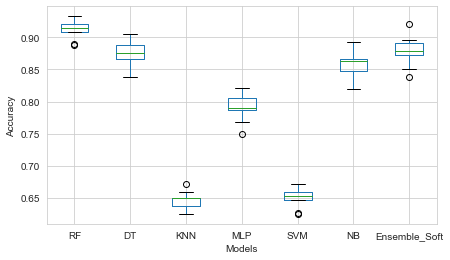

In [187]:
fig, axs = plt.subplots(figsize=(7,4))
score_results_df.boxplot()
axs.set_ylabel("Accuracy")
axs.set_xlabel("Models")

aoc for soft voting model is: 0.946


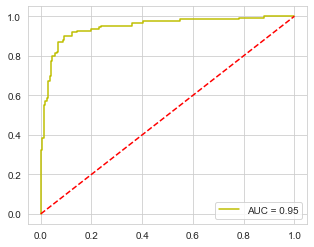

In [188]:
print('aoc for soft voting model is: %0.3f' % (roc_auc))

fig, axs = plt.subplots()
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.show()